<ipython-input-62-fcd17f795a54>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike, x='year', ax=ax1, palette='viridis')
<ipython-input-62-fcd17f795a54>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike, x='month', ax=ax2, palette='viridis')
<ipython-input-62-fcd17f795a54>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike, x='day', ax=ax3, palette='viridis')
<ipython-input-62-fcd17f795a54>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

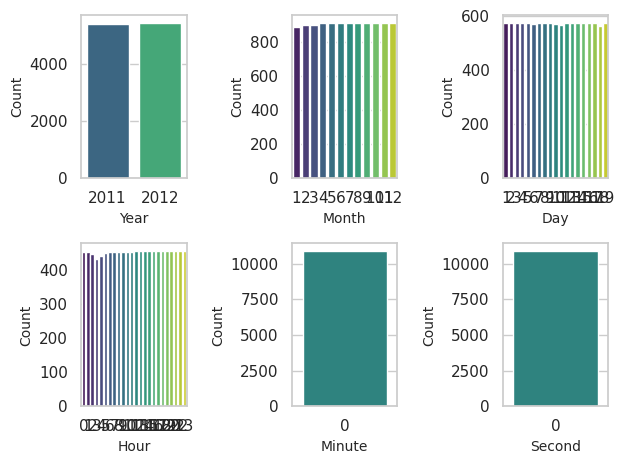

Mean Squared Error: 21660.42472402031
Root Mean Squared Error: 147.17481008657802


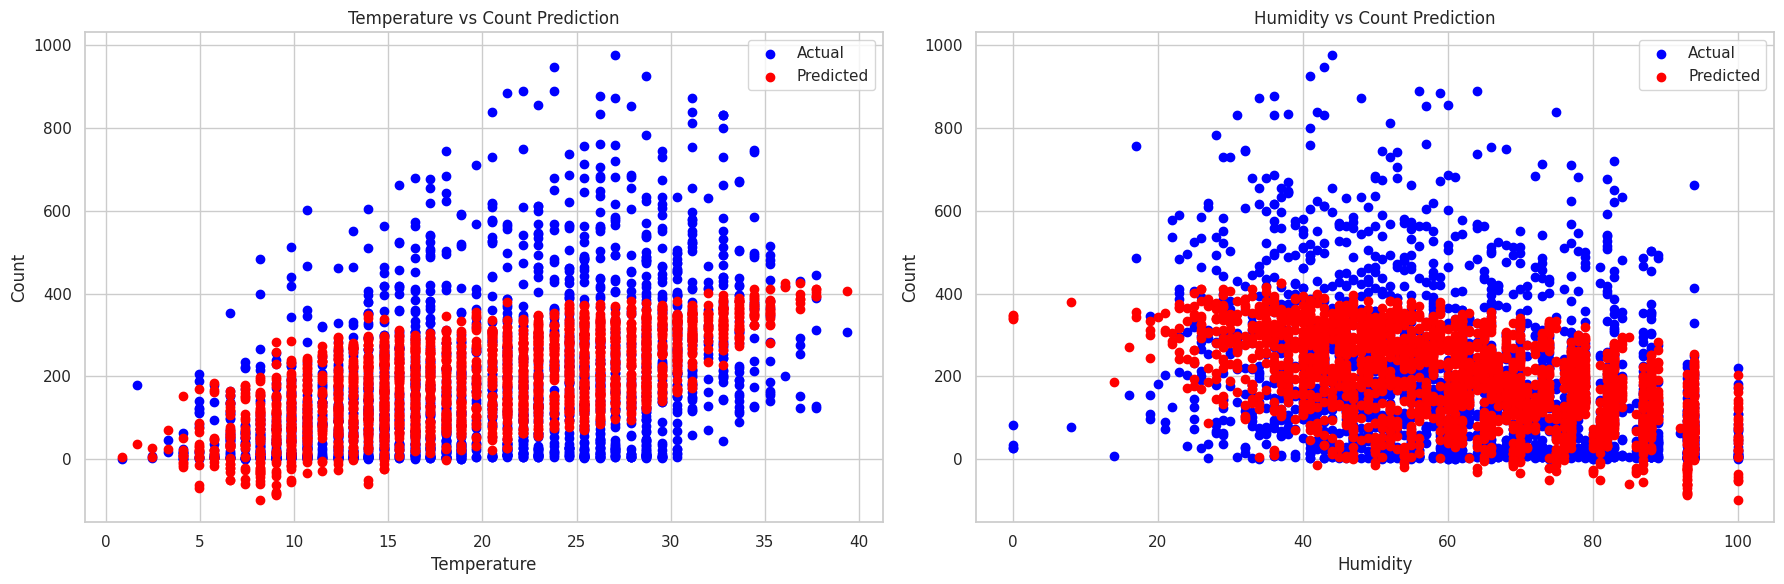

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# (1) 데이터 가져오기
  # uploaded = files.upload()
filename = list(uploaded.keys())[2]  # train.csv
bike = pd.read_csv(filename)


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
bike['datetime'] = pd.to_datetime(bike['datetime'])

bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second


# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
sns.countplot(data=bike, x='year', ax=ax1, palette='viridis')
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)

ax2 = fig.add_subplot(2, 3, 2)
sns.countplot(data=bike, x='month', ax=ax2, palette='viridis')
ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)

ax3 = fig.add_subplot(2, 3, 3)
sns.countplot(data=bike, x='day', ax=ax3, palette='viridis')
ax3.set_xlabel('Day', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)

ax4 = fig.add_subplot(2, 3, 4)
sns.countplot(data=bike, x='hour', ax=ax4, palette='viridis')
ax4.set_xlabel('Hour', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)

ax5 = fig.add_subplot(2, 3, 5)
sns.countplot(data=bike, x='minute', ax=ax5, palette='viridis')
ax5.set_xlabel('Minute', fontsize=10)
ax5.set_ylabel('Count', fontsize=10)

ax6 = fig.add_subplot(2, 3, 6)
sns.countplot(data=bike, x='second', ax=ax6, palette='viridis')
ax6.set_xlabel('Second', fontsize=10)
ax6.set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


# (4) X, y 컬럼 선택 및 train/test 데이터 분리

selected_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour' ]
X = bike[selected_columns]
y = bike['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# (5) LinearRegression 모델 학습

model = LinearRegression()
model.fit(X_train, y_train)



# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")



# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: temp vs count
axes[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')  # 실제 데이터 (파란색)
axes[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted')  # 예측 데이터 (빨간색)
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Count')
axes[0].set_title('Temperature vs Count Prediction')
axes[0].legend()

# 두 번째 그래프: humidity vs count
axes[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')  # 실제 데이터 (파란색)
axes[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted')  # 예측 데이터 (빨간색)
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Count')
axes[1].set_title('Humidity vs Count Prediction')
axes[1].legend()

plt.tight_layout()
plt.show()